# Homework 1: Data Cleaning and Exploratory Data Analysis 
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday September 14th**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a url is given for a data set, you will find the required data in the same directory as this assignment on GitHub.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### Problem 1 
***

Rebecca cares about [octopuses](https://english.stackexchange.com/questions/270/what-is-the-correct-plural-of-octopus/271). She cares so much that, up and down the coast, she opens octopus rescues, octopus temporary housing, and octopus sanctuaries, specifically targeted at juveniles in need. For convenience, we will refer to all the Juvenile Octopus Rescues, Temps, and Sanctuaries as "JORTS."

Rebecca wants to estimate the average food consumption across the JORTS this month so that she can plan the food orders for next month. She has 14 Rescues, 35 Temporary houses, and 56 Sanctuaries. What an empire!

Rebecca opens up the *JORTS Manager App* on her phone, which gives her a list of all of her coastal operations. She randomly picks 15 of them, and gets ready to email their managers asking for the monthly food reports. Of course, Rebecca has taken CSCI 3022, so she knows a thing or two about sampling, and so, to get a good estimate of the monthly food consumption (kilograms per month) for typical JORTS, she intentionally chooses 2 Rescues, 5 Temporary houses, and 8 Sanctuaries.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest 

Solution:

- the population: All the JORTS
- the sample frame: JORTS Manager App
- the sample: 2 Rescues, 5 Temps, and 8 Sanctuaries
- the type of sample: Stratified 
- the quantity of interest: Monthly food consumption in kilograms/month

### Problem 2 
***

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers and changes in the dataset is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ changes. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.7 \quad
y \quad
4.2 \quad
1.9
$$

**Part A**: Compute the sample mean and sample median for $y=0$. Compute them both again for $y=10$.

In [6]:
y = 0
x = np.array([4.6,5.0,6.5,7.7,y,4.2,1.9])
print("y={}".format(y))
print("The Mean is {:.3f}".format(x.mean()))
x.sort()
print("The Median is {:.1f}".format(x[3]))

y = 10
x = np.array([4.6,5.0,6.5,7.7,y,4.2,1.9])
print("y={}".format(y))
print("The Mean is {:.3f}".format(x.mean()))
x.sort()
print("The Median is {:.1f}".format(x[3]))

y=0
The Mean is 4.271
The Median is 4.6
y=10
The Mean is 5.700
The Median is 5.0


Solution:

The mean is 5.1 and the median is 4.8.

**Part B**: What should $y$ be if we want the mean to be equal to $10$? What should $y$ be if we want the mean to be equal to $0$?

The definition of the mean is:
$$\bar{x} = \frac{y + \sum_{k=1}^6 x_k}{7}$$
so solving for $y$ we get
$$y = 7 \bar{x} - \sum_{k=1}^6 x_k$$
Now, we can simply plug in $0$ and $10$ for $\bar{x}$ and compute what $y$ should be:

In [8]:
x = np.array([4.6,5.0,6.5,7.7,4.2,1.9])
y = 7 * 0 - np.sum(x)
print("For xbar=0, set y={}".format(y))
y = 7 * 10 - np.sum(x)
print("For xbar=10, set y={}".format(y))

For xbar=0, set y=-29.9
For xbar=0, set y=40.1


**Part C**: Compute the sample median for the following cases: 
- $y=10$ 
- $y=100$ 
- $y \to \infty$ 
- $y=5.01$ 
- $y=4.99$

In [11]:
yvals = [10,100,np.Infinity,5.01,4.99]
for y in yvals:
    x = np.array([4.6,5.0,6.5,7.7,y,4.2,1.9])
    print("When y is {}, the median is {}".format(y,np.median(x)))


When y is 10, the median is 5.0
When y is 100, the median is 5.0
When y is inf, the median is 5.0
When y is 5.01, the median is 5.0
When y is 4.99, the median is 4.99


**Part D**: Think about the previous parts, above, and describe in words or mathematical notation the answers to the following two questions:

- By varying $y$, what is the set of all the possible values that the sample mean could take on?
- By varying $y$, what is the set of all the possible values that the sample median could take on?

Solution:

We can push the sample mean around a lot, since we have an equation above that tells us what to set $y$ to for any $\bar{x}$. So $\bar{x}$ can be anything. In math, we could write this as $(-\infty,\infty)$.

The median is different. When $y\geq 5.0$, the median will be $5.0$.  Similarly, whenever $y \leq 4.6$, the median will be $4.6$. If $4.6 < y < 5.0$, then the median will be whatever we choose $y$ to be. Therefore, the median can be only in the closed interval $[4.6,5.0]$.

### Problem 3 
***

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

***
**Solution**: We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}
***

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). You may *not* use numpy's built in mean function. Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may *not* use any built-in sample variance functions.

In [13]:
def my_sample_mean(xx):
    n = len(xx)
    total = np.sum(xx)
    return total/n

def my_sample_var(xx):
    mean = my_sample_mean(xx)
    centered = xx - mean
    squared = centered**2
    return np.sum(squared)/(len(xx)-1)

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array, which contains the counts of perfectly round suckers found on a set of aquarium octopuses.

`octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]`

In [27]:
octopus_suckers = [25, 29, 40, 19, 7, 6, 3, 11, 19, 21, 22, 45, 27]
print(my_sample_mean(octopus_suckers),my_sample_var(octopus_suckers))

21.076923076923077 158.91025641025644


Solution:

- Octopus_suckers mean: 21.08. 
- Octopus_suckers variance: 158.91 

**Part D**: Implement a third function called `update_mean` that implements the formula whose valdity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first suckers count, the first two suckers counts, the first three suckers counts, and so on up to all the suckers counts. Store your means in a numpy array called `sucker_means`.

In [29]:
def update_mean(prev_mean,xn,n):
    return prev_mean + (xn-prev_mean)/n

sucker_means = []
for idx,w in enumerate(octopus_suckers):
    if idx==0:
        sucker_means.append(w)
    else:
        sucker_means.append(update_mean(sucker_means[idx-1],w,idx+1))

sucker_means = np.array(sucker_means)

In [31]:
for idx,octopus in enumerate(sucker_means):
    print("The first {:.0f} octopuses have average suckers of {:.3f}".format(idx+1,octopus))

The first 1 octopuses have average suckers of 25.000
The first 2 octopuses have average suckers of 27.000
The first 3 octopuses have average suckers of 31.333
The first 4 octopuses have average suckers of 28.250
The first 5 octopuses have average suckers of 24.000
The first 6 octopuses have average suckers of 21.000
The first 7 octopuses have average suckers of 18.429
The first 8 octopuses have average suckers of 17.500
The first 9 octopuses have average suckers of 17.667
The first 10 octopuses have average suckers of 18.000
The first 11 octopuses have average suckers of 18.364
The first 12 octopuses have average suckers of 20.583
The first 13 octopuses have average suckers of 21.077


### Problem 4
*** 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios. Access the titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.  

In [3]:
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours insteas. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

Solution:  If there were class warfare, we would expect that the first class is asserting its privilege over the lower classes, so first class passengers should be more likely to survive.  If there were chivalry, it would be the case that men have lower survival rates than women.  These are not mutually exclusive

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

In [4]:
dfTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part C**: Determine the fraction of survivors from each passenger class. 

In [5]:
for pc in [1,2,3]:
    survived = dfTitanic.loc[dfTitanic["Pclass"]==pc, "Survived"].sum()
    total = len(dfTitanic.loc[dfTitanic["Pclass"]==pc])
    print("Class {} Survival Fraction: {:.3f}".format(pc, survived/total))

Class 1 Survival Fraction: 0.643
Class 2 Survival Fraction: 0.483
Class 3 Survival Fraction: 0.252


***
**Solution**: The fraction of survivors by class are as follows 

\begin{array}{c|c}
\textrm{Class} & \textrm{Survival Rate} \\
\hline
1 & 0.643 \\
2 & 0.483 \\
3 & 0.252
\end{array}

We definitely see a correlation between Survival Rate and being a member of the upper class 

***

**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

In [6]:
for pc in [1,2,3]:
    for sex in ["male", "female"]:
        survived = dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"].sum()
        total = len(dfTitanic.loc[(dfTitanic["Pclass"]==pc) & (dfTitanic["Sex"]==sex), "Survived"])
        print(pc, sex, survived, total)
        print("Class {} {:>6} Survival Fraction: {:.3f}".format(pc, sex, survived/total))

1 male 36 93
Class 1   male Survival Fraction: 0.387
1 female 72 75
Class 1 female Survival Fraction: 0.960
2 male 16 87
Class 2   male Survival Fraction: 0.184
2 female 54 58
Class 2 female Survival Fraction: 0.931
3 male 39 283
Class 3   male Survival Fraction: 0.138
3 female 62 118
Class 3 female Survival Fraction: 0.525


***
**Solution**: The fraction of survivors by class and sex are as follows 

\begin{array}{c|c|c}
\textrm{Class} & \textrm{Sex} & \textrm{Survival Rate} \\
\hline
1 & \textrm{male}   &  0.387 \\
1 & \textrm{female} &  0.960 \\ 
2 & \textrm{male}   &  0.184 \\
2 & \textrm{female} &  0.931 \\ 
3 & \textrm{male}   &  0.138 \\
3 & \textrm{female} &  0.525 \\ 
\end{array}

Women in 3rd class survived at a slightly higher rate than men in 1st class. 

***

**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

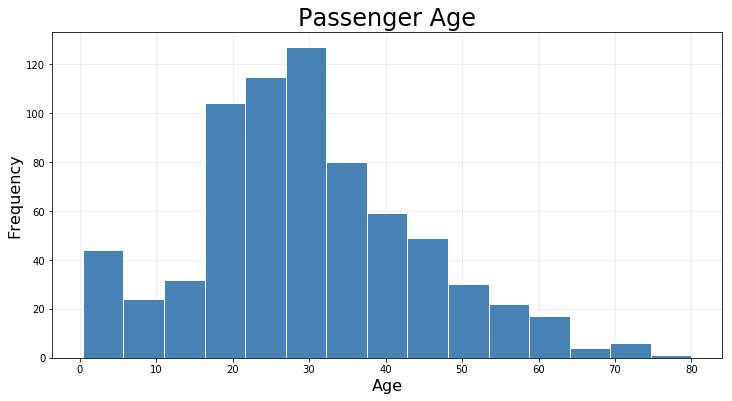

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
dfTitanic.hist(column="Age", ax=ax, facecolor="steelblue", edgecolor="white",bins=15)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_title("Passenger Age", fontsize=24)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

The distribution is **unimodal** and has a rightward or **positive skew**.

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [10]:
mean_survived = dfTitanic.loc[(dfTitanic["Survived"]==1) & (dfTitanic["Sex"]=="female"), "Age"].mean()
mean_died = dfTitanic.loc[(dfTitanic["Survived"]==0) & (dfTitanic["Sex"]=="female"), "Age"].mean()
median_survived = dfTitanic.loc[(dfTitanic["Survived"]==1) & (dfTitanic["Sex"]=="female"), "Age"].median()
median_died = dfTitanic.loc[(dfTitanic["Survived"]==0) & (dfTitanic["Sex"]=="female"), "Age"].median()

print("Mean Age:  Survived = {:.3f} vs. Died = {:.3f}".format(mean_survived, mean_died))
print("Median Age: Survived = {:.3f} vs. Died = {:.3f}".format(median_survived, median_died))

Mean Age:  Survived = 28.406 vs. Died = 28.922
Median Age: Survived = 26.000 vs. Died = 29.000


The means are practically identical. The median age of female survivors was 2 years younger than the median age of those women who didn't survive. 

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

Women tended to survive more than men, so it appears that the men were being chivalrous and making sure that the women got off the boat first. On the other hand, the first class folks were far more likely to survive. It looks, therefore, like a mix of both. 

### Problem 5 - No arm in another tentacle problem, eh?
***

_Octopuses have eight arms, which are often called tentacles._ 

While technically a fact about the noble octopus, this doesn't really do much for the imagination. Go find another octopus fact that you think is cool *and* that you think no one else is likely to report! In fact, *if your fact is unique, you'll earn extra credit on this problem*! Submit your fact [here](https://docs.google.com/forms/d/e/1FAIpQLScjminsyl9Q1d_OswAXHNLKPj9Gu-00qhVsy07VYDZC8d36LQ/viewform?usp=sf_link).

### Problem 6 - Dirty Data
***
Access the data from url https://www.stat.berkeley.edu/~statlabs/data/babies.data and store the information in a Pandas DataFrame.  A description of the variables can be found at https://www.stat.berkeley.edu/~statlabs/labs.html.  These data are a subset from a much larger study dealing with child health and development. 


In [3]:
df = pd.read_csv("https://www.stat.berkeley.edu/~statlabs/data/babies.data", delim_whitespace=True)
df.head(10)

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0
7,132,245,0,23,65,140,0
8,120,289,0,25,62,125,0
9,143,299,0,30,66,136,1



**Part A**: Create a clean data set that removes subjects if any observations on the subject are unknown.  Note that that collectors of the data set used values like $9$, $99$, $999$, to denote unknown values.  You can look at the documentation linked in the problem description to determine which unknown-value marker was used for each characteristics.  Store the modified data set in a Pandas DataFrame called dfBabies. 

In [4]:
dfBabies = df.copy()
dfBabies.loc[dfBabies["bwt"]==999, "bwt"] = np.nan
dfBabies.loc[dfBabies["gestation"]==999, "gestation"] = np.nan
dfBabies.loc[dfBabies["parity"]==9, "parity"] = np.nan
dfBabies.loc[dfBabies["height"]==99, "height"] = np.nan
dfBabies.loc[dfBabies["weight"]==999, "weight"] = np.nan
dfBabies.loc[dfBabies["smoke"]==9, "smoke"] = np.nan
dfBabies = dfBabies.dropna()
dfBabies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120.0,284.0,0.0,27,62.0,100.0,0.0
1,113.0,282.0,0.0,33,64.0,135.0,0.0
2,128.0,279.0,0.0,28,64.0,115.0,1.0
4,108.0,282.0,0.0,23,67.0,125.0,1.0
5,136.0,286.0,0.0,25,62.0,93.0,0.0


**Part B**: Use the information in dfBabies to create a density histogram of the birth weights of babies whose mothers have never smoked (smoke=0) and another histogram placed directly below the first in the same graphics device for the birth weights of babies whose mothers currently smoke (smoke=1).  Make the range of the horizontal axis $30$ to $180$ (ounces) for both histograms.  Make sure to give each subplot titles and label axes. 

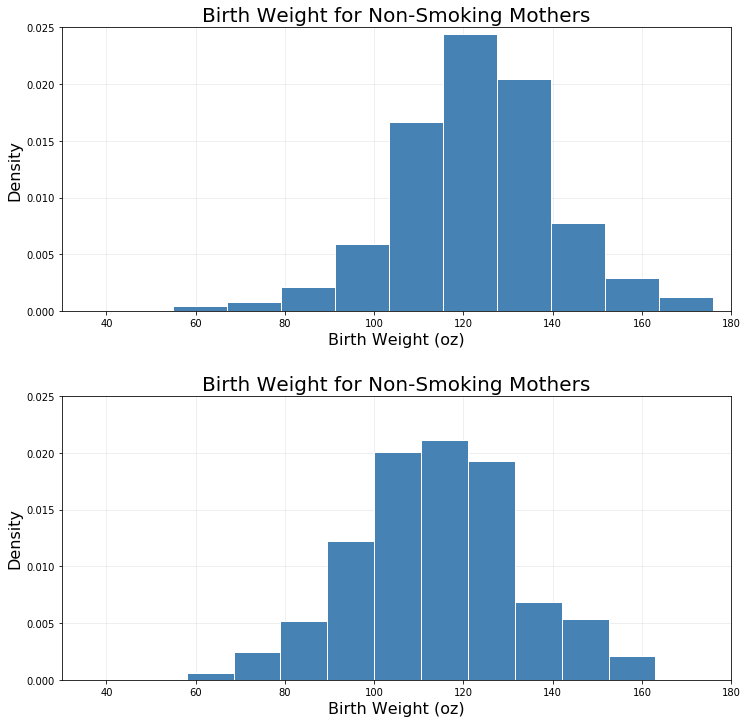

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
dfNonSmoke = dfBabies.loc[dfBabies["smoke"]==0]
dfNonSmoke.hist(column="bwt", ax=axes[0], density=True, facecolor="steelblue", edgecolor="white")
axes[0].set_xlabel("Birth Weight (oz)", fontsize=16)
axes[0].set_ylabel("Density", fontsize=16)
axes[0].set_title("Birth Weight for Non-Smoking Mothers", fontsize=20)
axes[0].set_xlim([30,180])
axes[0].set_ylim([0,0.025])
axes[0].grid(alpha=0.25)
axes[0].set_axisbelow(True)

dfSmoke = dfBabies.loc[dfBabies["smoke"]==1]
dfSmoke.hist(column="bwt", ax=axes[1], density=True, facecolor="steelblue", edgecolor="white")
axes[1].set_xlabel("Birth Weight (oz)", fontsize=16)
axes[1].set_ylabel("Density", fontsize=16)
axes[1].set_title("Birth Weight for Non-Smoking Mothers", fontsize=20)
axes[1].set_xlim([30,180])
axes[1].set_ylim([0,0.025]);
axes[1].grid(alpha=0.25)
axes[1].set_axisbelow(True)

**Part C**: Based on the histograms in **Part B**, characterize the distribution of baby birth weights for both non-smoking and smoking mothers. 

**Answer**: Both histograms are unimodal and appear to be slightly negatively skewed. 

**Part D**: What are the mean and median weight difference between babies of smokers and non-smokers?  Can you think of any reason not to use the mean as a measure of center to compare birth weights for this problem? 

In [22]:
mean_diff = dfBabies.loc[dfBabies["smoke"]==0, "bwt"].mean() - dfBabies.loc[dfBabies["smoke"]==1, "bwt"].mean()
median_diff = dfBabies.loc[dfBabies["smoke"]==0, "bwt"].median() - dfBabies.loc[dfBabies["smoke"]==1, "bwt"].median()
print("Mean Weight Difference = Mean(smoke==0)-Mean(smoke==1) = {:.3f} ozs".format(mean_diff))
print("median Weight Difference = Med(smoke==0)-Med(smoke==1) = {:.3f} ozs".format(median_diff))

Mean Weight Difference = Mean(smoke==0)-Mean(smoke==1) = 9.261 ozs
median Weight Difference = Med(smoke==0)-Med(smoke==1) = 8.000 ozs


***
**Solution**: The mean difference between birth weights for non-smokers and smokers is $9.261$ ozs

The median difference between birth weights for non-smokers and smokers is $8$ ozs

We should be concerned about using mean as a measure of center for birth weight because the data has many outliers (especially for non-smoking mothers) and this could skew the mean. 
***

**Part E**: Create side-by-side box-and-whisker plots to compare the birth weights of babies whose mothers never smoked and those who currently smoke.  Use the box-and-whisker plot conventions discussed in lecture. 

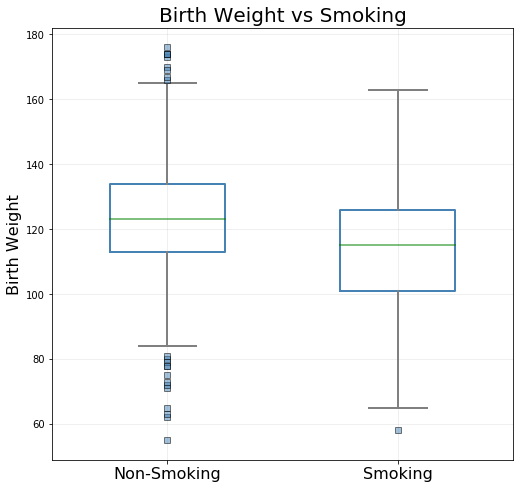

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
bp = dfBabies.boxplot(column="bwt", by="smoke", widths=[.5,.5], ax=ax, return_type='dict')
ax.set_title("Birth Weight vs Smoking", fontsize=20)
ax.set_ylabel("Birth Weight", fontsize=16)

for column in bp:
    
    # Change properties in boxes 
    for box in column['boxes']:
        box.set(color='steelblue', linewidth=2)
    
    # Change properties of whiskers 
    for whisker in column['whiskers']:
        whisker.set(color='gray', linewidth=2)

    # Change properties of caps 
    for cap in column['caps']:
        cap.set(color='gray', linewidth=2)

    # Change properties of median 
    for cap in column['medians']:
        cap.set(color='green', linewidth=2, alpha=0.5)

    # Change properties of fliers (outliers) 
    for cap in column['fliers']:
        cap.set(markerfacecolor='steelblue', linewidth=2, marker='s', markersize=6, alpha=0.5)
        
# Set names of plots
plt.xticks([1,2],["Non-Smoking", "Smoking"], rotation=0, fontsize=16)

# Get rid of automatically generated titles and xlables
plt.suptitle("")
ax.set_xlabel("")

# Make grid-lines lighter
ax.grid(alpha=0.25);

**Part F**: Using the box-and-whisker plots from **Part E** comment on the distributions of body weights of babies within each smoking / non-smoking groups as well as the comparison of the two classes. 

### Challenge Problem
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors.  

In the 1954 book _How to Lie with Statistics_ authors Darrell Huff and Irving Geis describe many common ways that people concoct misleading graphics.  An excerpt from these chapters can be found [here](https://piazza.com/class_profile/get_resource/j6pfvv6b9ze4gi/j771gy7fdpe3e7).  

Your job is to go out onto the web and find some data that you find interesting.  Then create both a misleading and a non-misleading version of a graphical summary for the data. 